In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

%matplotlib inline

## Conceptual

### Q1.
***Indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.***


**a)** A more flexible method would perform better in this case, as we can avoid overfitting the data because of the large sample size.

**b)** A less flexible model would perform better in this case, as using a more flexible model would result in overfitting the data to the small sample size.

**c)** A more flexible model would perform better in this case, as less flexible models tend to result in more rigid and almost linear fits which wouldn't work in the case of our non-linear data.

**d)** This error term is irreducible and isn't affected by the flexibility of our model, though we would like to find a flexibility that minimises the bias and variance of $ \hat{f}(x_0) $.


### Q2.
***Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.***

**a)** Regression, inference, n=500, p=3

**b)** Classification, prediction, n=20, p=13

**c)** Regression, prediction, n=52, p=3

### Q3.

***We now revisit the bias-variance decomposition.***

**a)** Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one

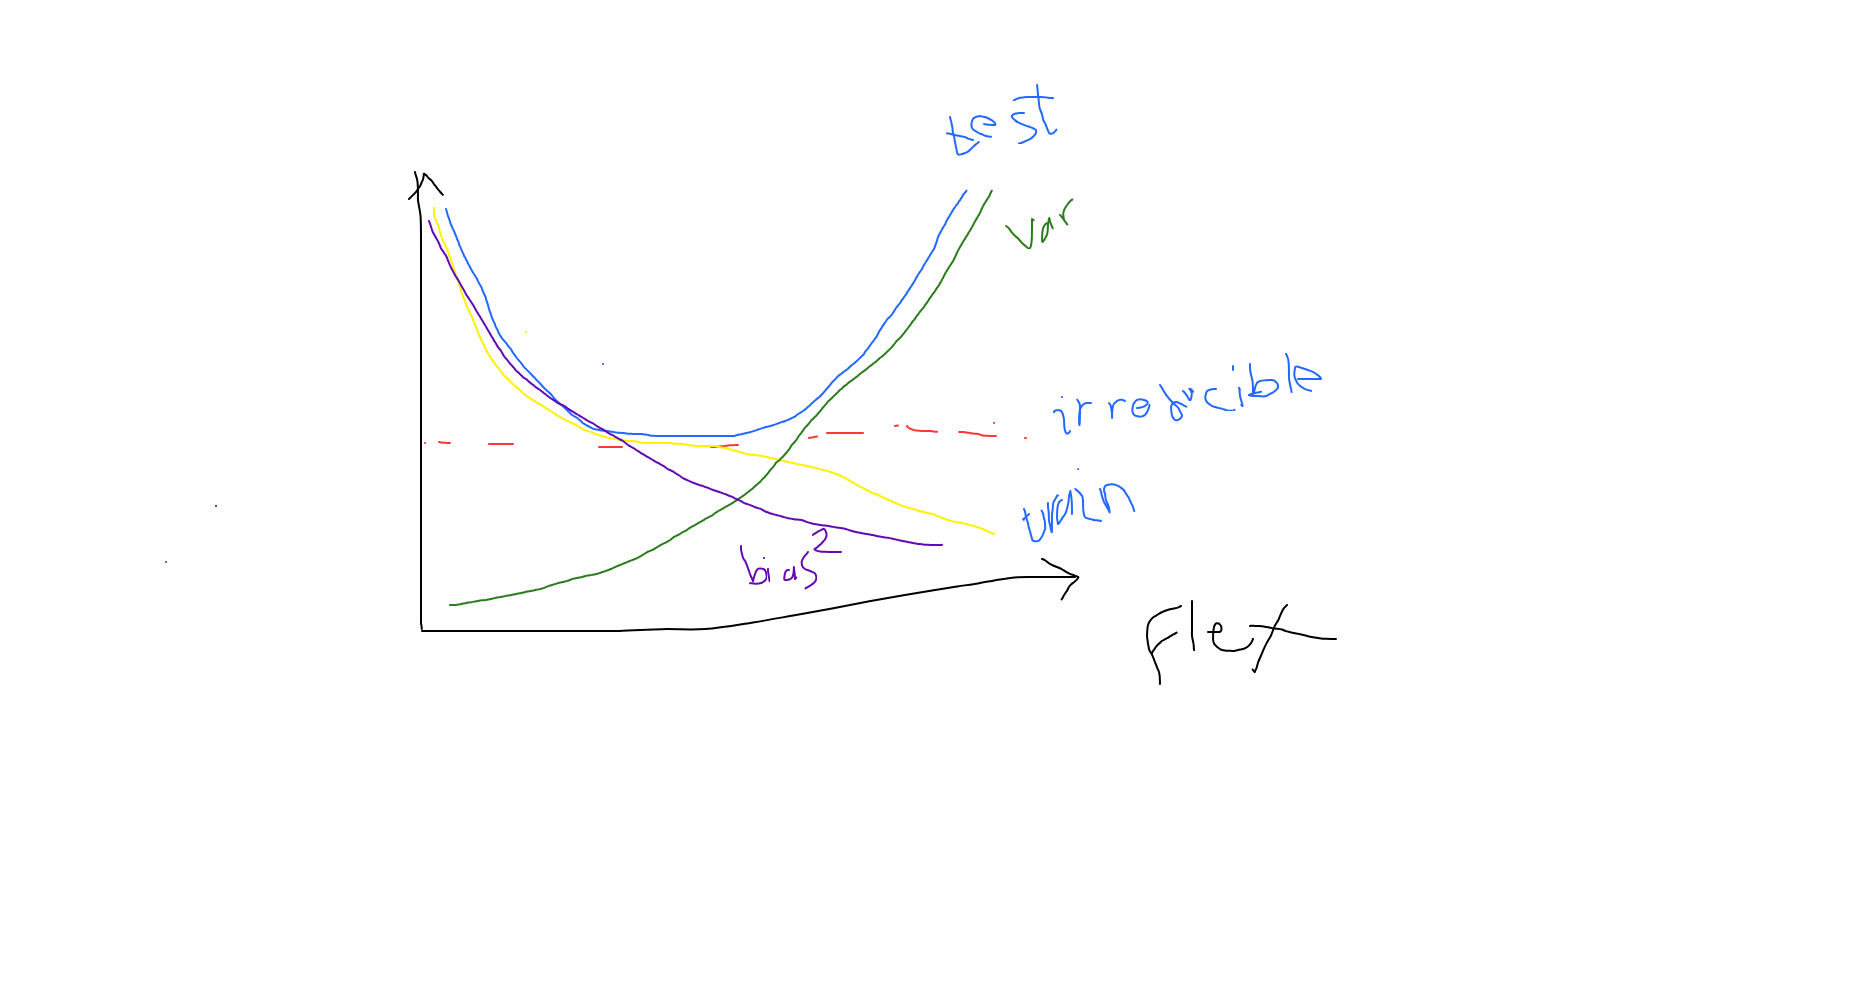

**b)** Explain why each of the five curves has the shape displayed in part (a).

irreducible error curve: it has the shape of a straight horizontal line because it's not affected by the flexibility of the model and always has the same value.

variance curve: the variance in the prediction increases as the flexibility increases.

bias^2: the squared bias decreases the more flexible the model.

test error: because it's the sum of the irreducible error, bias^2, and variance which results in a U-shaped curve that has an asymptote at the irreducible error line.

training error: it starts off decreasing but as the flexibility increases beyond a certain point the model starts overfitting on the noise in the data which results in the curve going below the irreducible error line.

### Q4. 
***You will now think of some real-life applications for statistical learning.***

a) Classification 
1. Predicting whether a certain plant is a weed or a useful plant from an image. Examples of predictors could be things like the color, shape, and other features of the plant.
2. Spam detection, predicting whether a given message is spam. Examples of predictors could be the frequency of certain words or their appearance in the message, the sender's email/domain name.
3. Understanding what predictors affect the success of a startup company. Examples of predictors could be the market it tackles, its buisness model, its size, the amount of investment it gets during a certain period and the response is whether it succeeded or failed. (inference)

b) Regression

1. Marketing Analysis. Understanding what method of advertising increases sales the most. Predictors could be the various adverting methods and the response the number of sales. (inference)
2. Sales Forecasting. Predicting the number of sales at the end of a time period.
3. House price Forecasting. Predicting the price of a house based on its features like location, # of rooms, construction date, and other features.

c) Cluster Analysis

1. Grouping diseases together in classes based on their features.
2. Reccommendation Systems. Giving a user specific media reccs based on their media consumption history.
3. Detecting anomalies in data.

### Q5.

***What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?***

Advantages:
1. Can captures more complex and non-linear relationships better than a less flexible method.

Disadvantages:
1. More prone to overfitting than less flexible models.

A more flexible method would be preferred in situations where the sample size is sufficiently large and the underlying distribution seems to be non-linear.

A less flexible method would be preferred when the sample size is small and the underlying distribution seems to be linear.

### Q6.

***Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?***

Parametric approaches assume a specific prediction function $f$ and try to estimate the parameters for $f$ using the data.

Non-parametric approaches don't make a specific assumption about $f$ they instead try to make an estimate as close to $f$ as possible using the data.

Advantages:
1. Less computationally intensive.
2. Easier to estimate paramters than an entire arbitrary function.

Disadvantages:
1. If the chosen model is too far from the true $f$ then we'll end up with poor results. 

### Q7.

***The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.***

In [3]:
x1 = np.array([0, 2, 0, 0, -1, 1])
x2 = np.array([3, 0, 1, 1, 0, 1])
x3 = np.array([0, 0, 3, 2, 1, 1])
y = np.array([0, 0, 0, 1, 1, 0])

In [4]:
def euclidean_distance(obs, test_points) -> int:
    return np.sqrt(np.sum(np.abs(test_points[0] - x1[obs])**2 + np.abs(test_points[1] - x2[obs])**2 + np.abs(test_points[2] - x3[obs])**2))

In [5]:
test_points = [0, 0, 0]
print("(a) Euclidean distance between each observation and the test point, X1=X2=X3=0")
for i in range(6):
    print(i+1, "Green\t" if y[i] else "Red\t", euclidean_distance(i, test_points))

(a) Euclidean distance between each observation and the test point, X1=X2=X3=0
1 Red	 3.0
2 Red	 2.0
3 Red	 3.1622776601683795
4 Green	 2.23606797749979
5 Green	 1.4142135623730951
6 Red	 1.7320508075688772


***(b)*** What is our prediction with K = 1? Why?

Green, since the closest point (5) is Green .

***(c)*** What is our prediction with K = 3? Why?

Red, because the 3 nearest neighbors are Green, Red, Red (5, 6, 2)

***(d)*** If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why

We'd expect it to be on the smaller side since smaller values of K result in more flexible fits which would work better for non-linear decision boundaries.

## Applied

In [6]:
df = pd.read_csv('./data/College.csv')
df = df.rename({"Unnamed: 0": "College"}, axis=1).set_index('College')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [147]:
df.describe(include=np.number)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [142]:
df.describe(include=pd.Categorical)

,Private
count,777
unique,2
top,Yes
freq,565


In [9]:
df.nunique()

Private          2
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F.Undergrad    714
P.Undergrad    566
Outstate       640
Room.Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S.F.Ratio      173
perc.alumni     61
Expend         744
Grad.Rate       81
dtype: int64

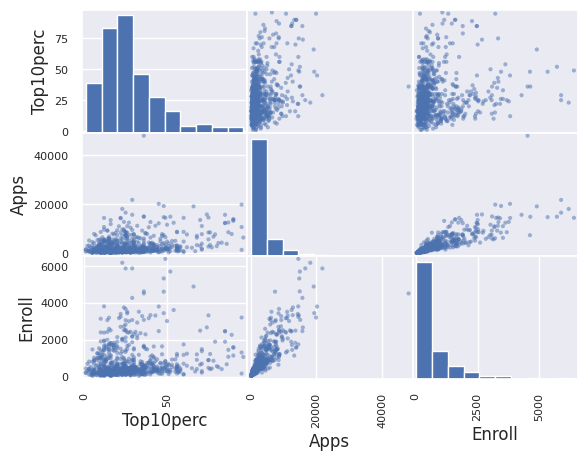

In [10]:
pd.plotting.scatter_matrix(df[['Top10perc', 'Apps', 'Enroll']]);

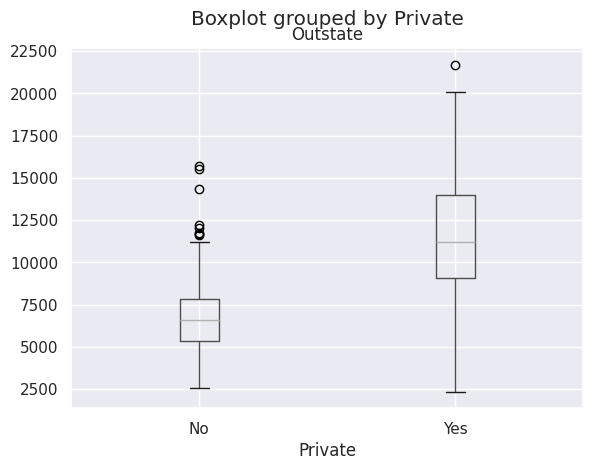

In [150]:
df.boxplot('Outstate', by='Private');

In [151]:
df['Elite'] = pd.cut(df['Top10perc']/100, 
                     [0,0.5,1],
                     labels=['No', 'Yes'])

In [13]:
df['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

In [14]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


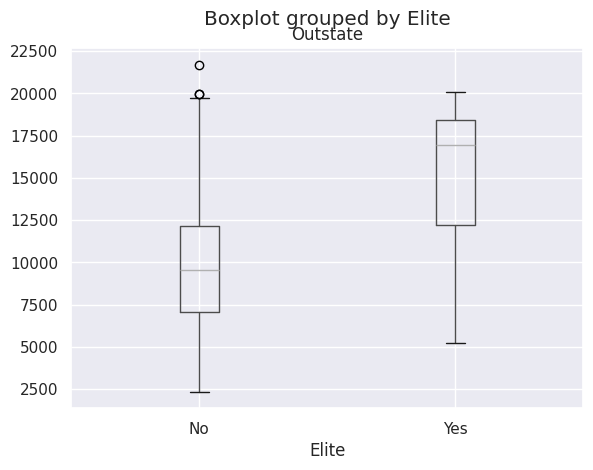

In [15]:
df.boxplot('Outstate', by='Elite');

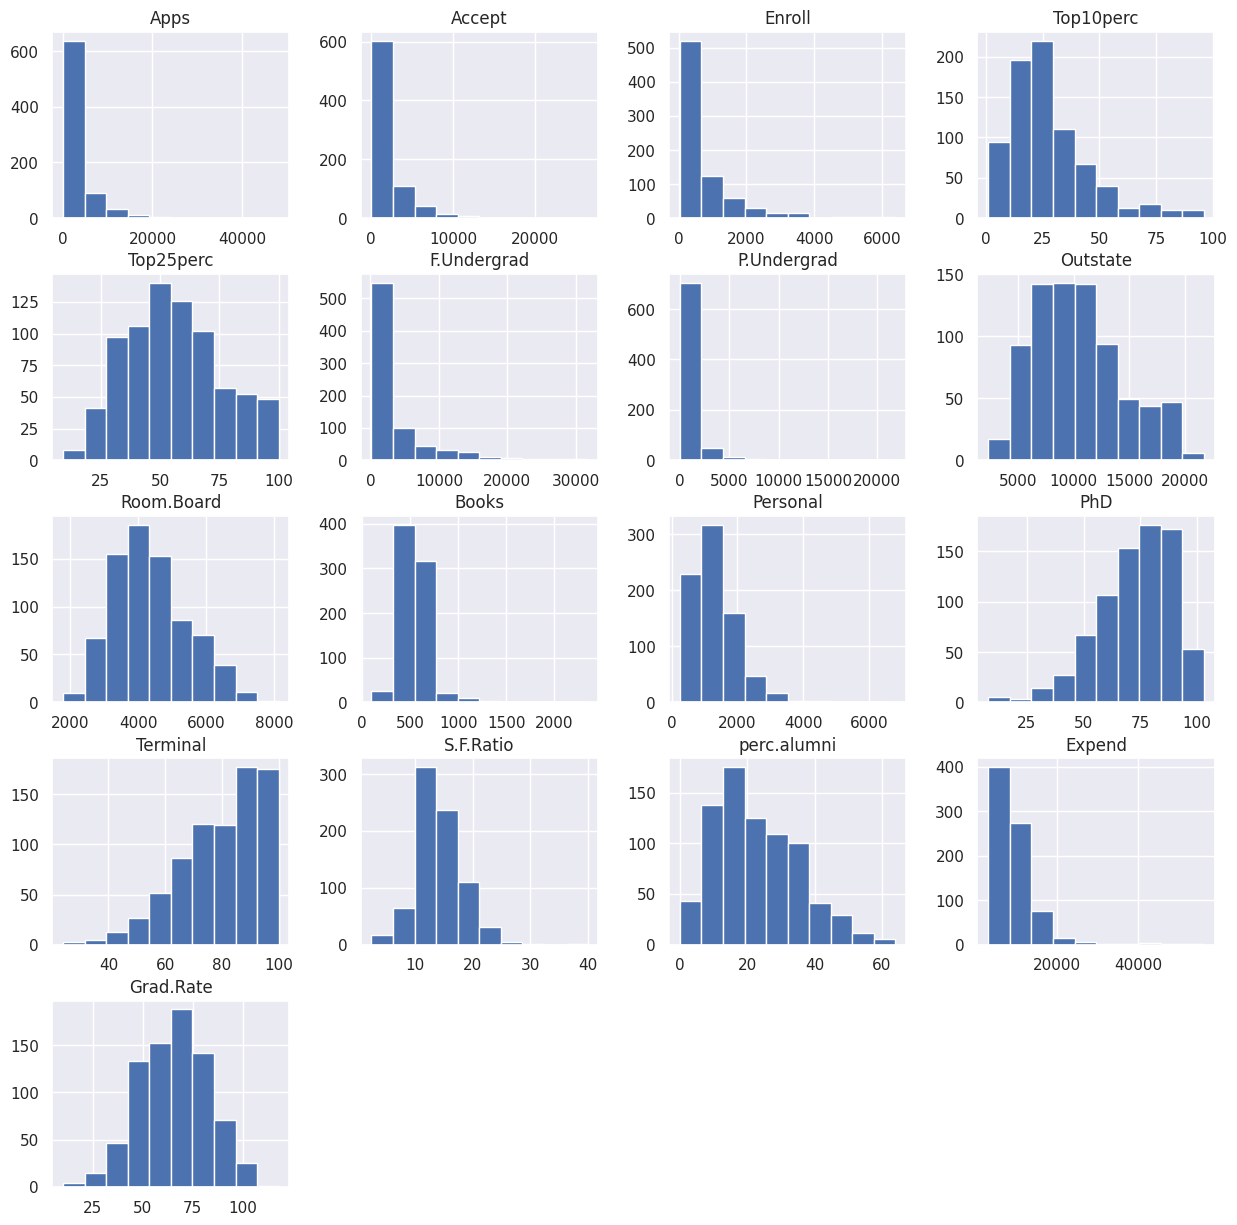

In [16]:
df.hist(figsize=(15,15));

### Q9.

***This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data***

In [152]:
from ISLP import load_data

In [153]:
auto = load_data('Auto')

In [154]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [155]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [156]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [157]:
auto.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
dtype: int64

***(a)*** All are quantitative variables except the name which is used for the index.

***(b) & (c)***

In [163]:
auto.describe(include='all').loc[['mean', 'std', 'min', 'max']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


***(d)***

In [70]:
auto.iloc[10:85,].index

Index(['dodge challenger se', 'plymouth 'cuda 340', 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii', 'plymouth duster',
       'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'datsun pl510', 'chevrolet vega 2300',
       'toyota corona', 'amc gremlin', 'plymouth satellite custom',
       'chevrolet chevelle malibu', 'ford torino 500', 'amc matador',
       'chevrolet impala', 'pontiac catalina brougham', 'ford galaxie 500',
       'plymouth fury iii', 'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 2000', 'opel 1900', 'peugeot 304', 'fiat 124b',
       'toyota corolla 1200', 'datsun 1200', 'volkswagen model 111',
       'plymouth crick

In [71]:
auto_dropped = auto.drop(index=auto.iloc[10:85].index)

In [72]:
auto_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, buick skylark 320 to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           282 non-null    float64
 1   cylinders     282 non-null    int64  
 2   displacement  282 non-null    float64
 3   horsepower    282 non-null    int64  
 4   weight        282 non-null    int64  
 5   acceleration  282 non-null    float64
 6   year          282 non-null    int64  
 7   origin        282 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 19.8+ KB


In [74]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [75]:
auto_dropped.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,25.006028,5.283688,180.120567,99.039007,2884.939716,15.713121,77.482270,1.631206
std,7.921384,1.637315,96.164263,34.197280,793.236373,2.601575,3.017394,0.830138
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.500000,70.000000,1.000000
25%,18.125000,4.000000,98.000000,74.250000,2188.500000,14.000000,75.000000,1.000000
50%,24.500000,4.000000,140.000000,90.000000,2715.500000,15.500000,78.000000,1.000000
75%,31.000000,6.000000,250.000000,112.000000,3435.250000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4952.000000,24.600000,82.000000,3.000000


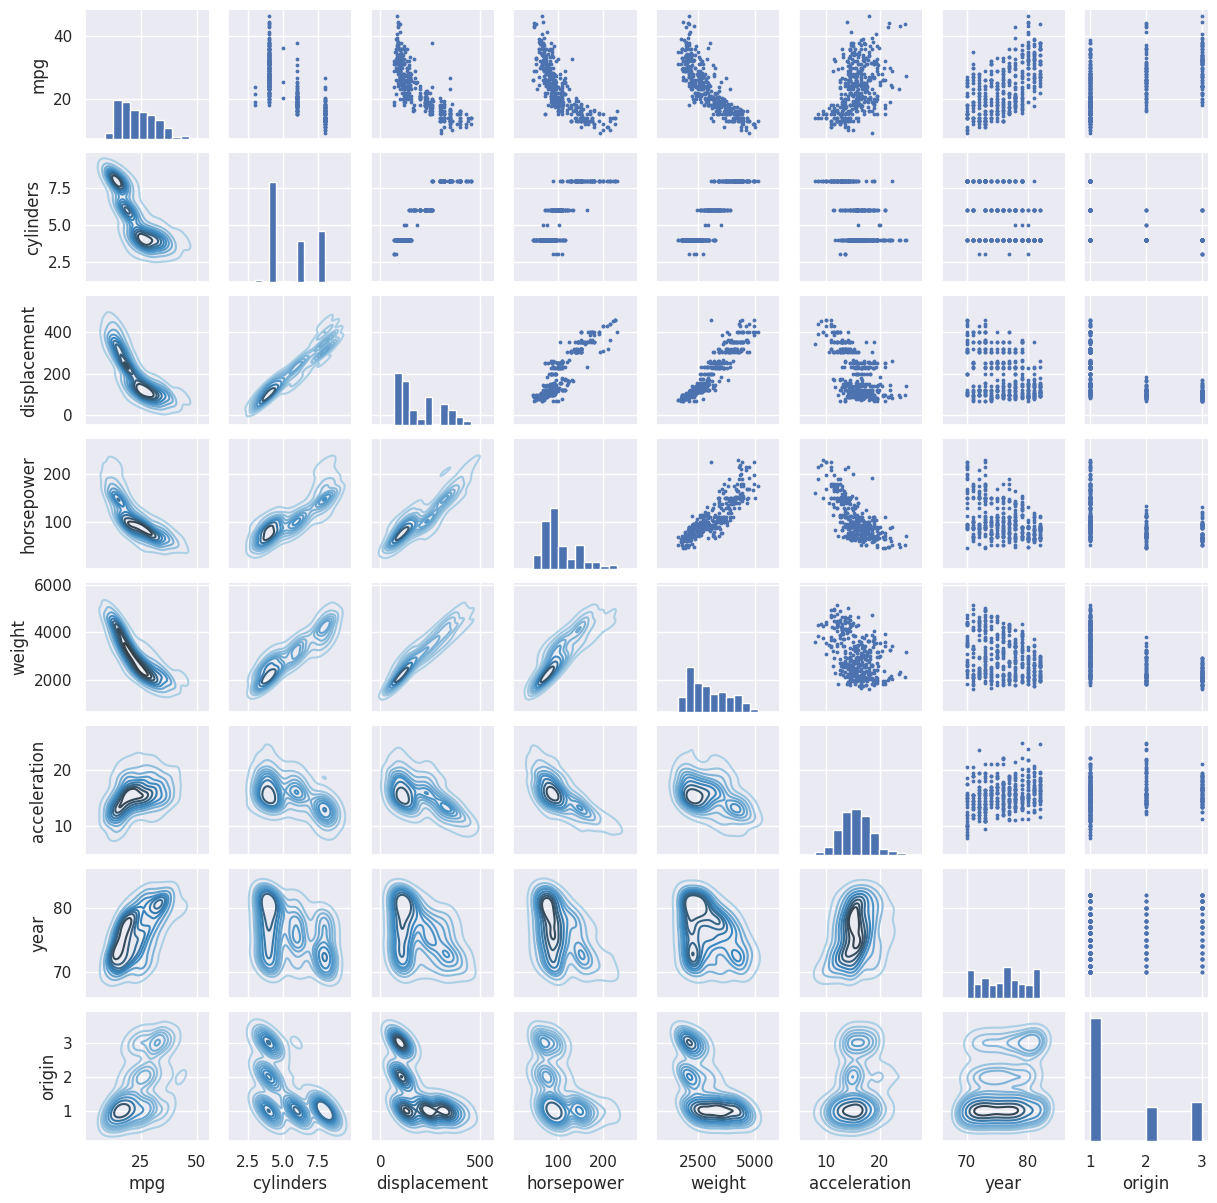

In [172]:
g = sns.PairGrid(auto)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.figure.set_size_inches(12, 12)

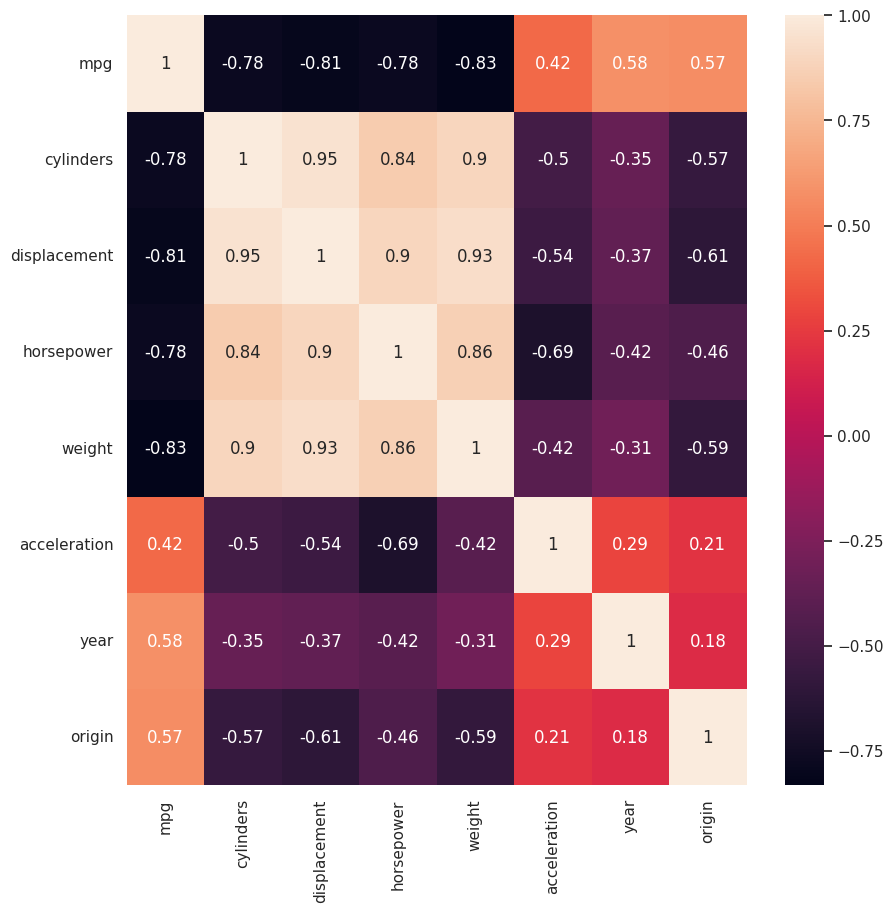

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
sns.heatmap(auto.corr(), annot=True);

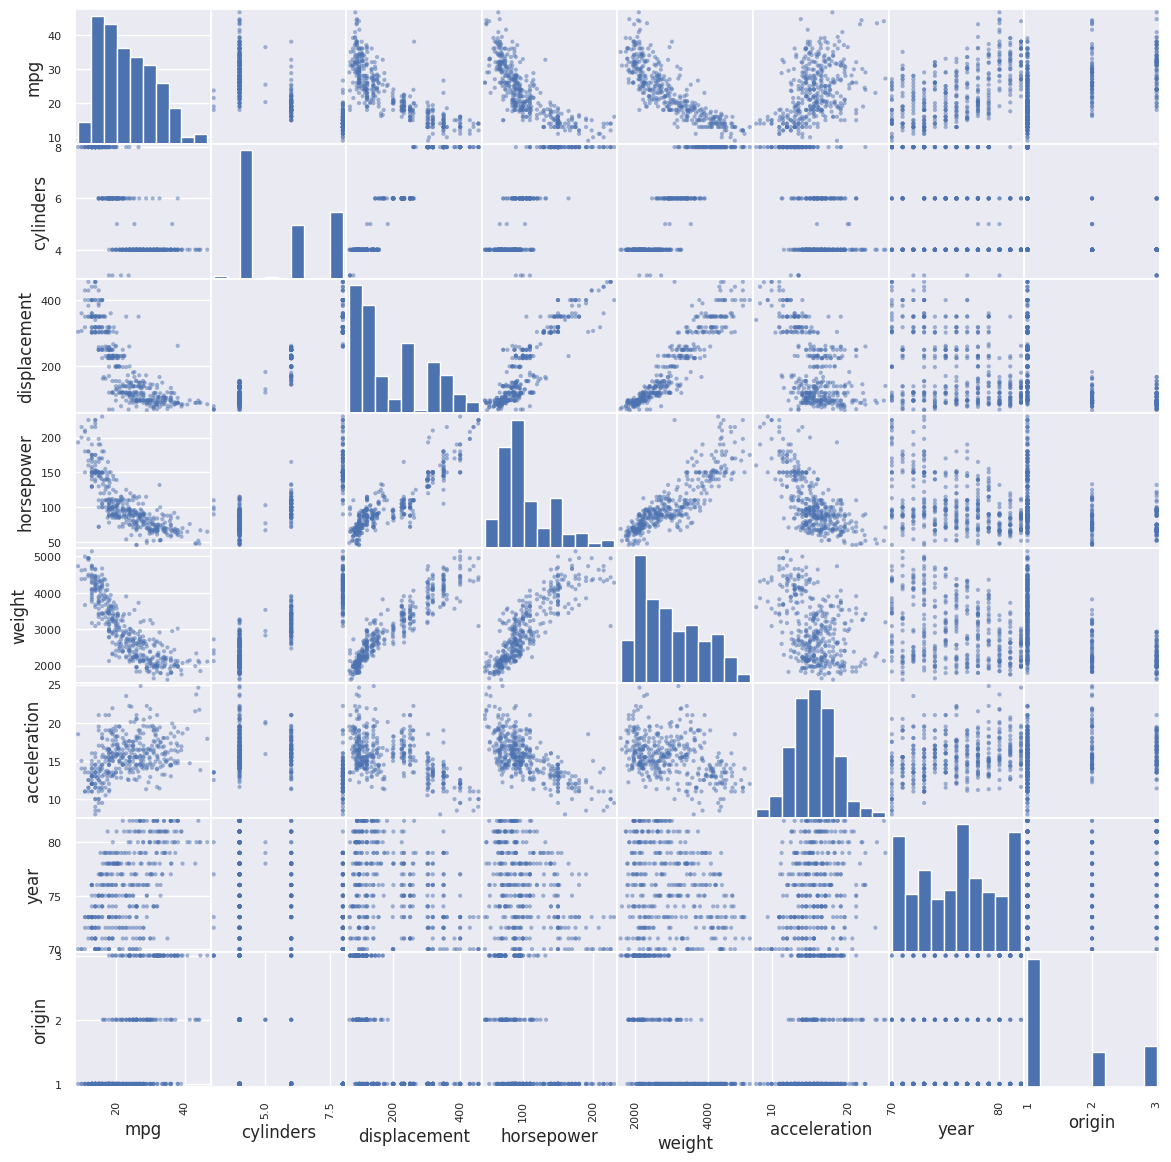

In [87]:
pd.plotting.scatter_matrix(auto, figsize=(14, 14));

`mpg` seems to be negatively correlated with `cylinders`, `weight`, `horsepower`, and `displacement`, and positively correlated with `acceleration`, `year`, and `origin`.

***(f)*** Yes, we can predict `mpg` on the basis of the other variables as there are strong correlation relationships between `mpg` and the other predictors.

### Q10.

***This exercise involves the Boston housing data set***

In [90]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [91]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [92]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


***(b)*** 506 rows and 13 columns.

A data set containing housing values in 506 suburbs of Boston.


- `crim`: per capita crime rate by town.

- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.

- `indus`: proportion of non-retail business acres per town.

- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- `nox`: nitrogen oxides concentration (parts per 10 million).

- `rm`: average number of rooms per dwelling.

- `age`: proportion of owner-occupied units built prior to 1940.

- `dis`: weighted mean of distances to five Boston employment centres.

- `rad`: index of accessibility to radial highways.

- `tax`: full-value property-tax rate per $10,000.

- `ptratio`: pupil-teacher ratio by town.

- `lstat`: lower status of the population (percent).

- `medv`: median value of owner-occupied homes in $1000s.


***(c)***

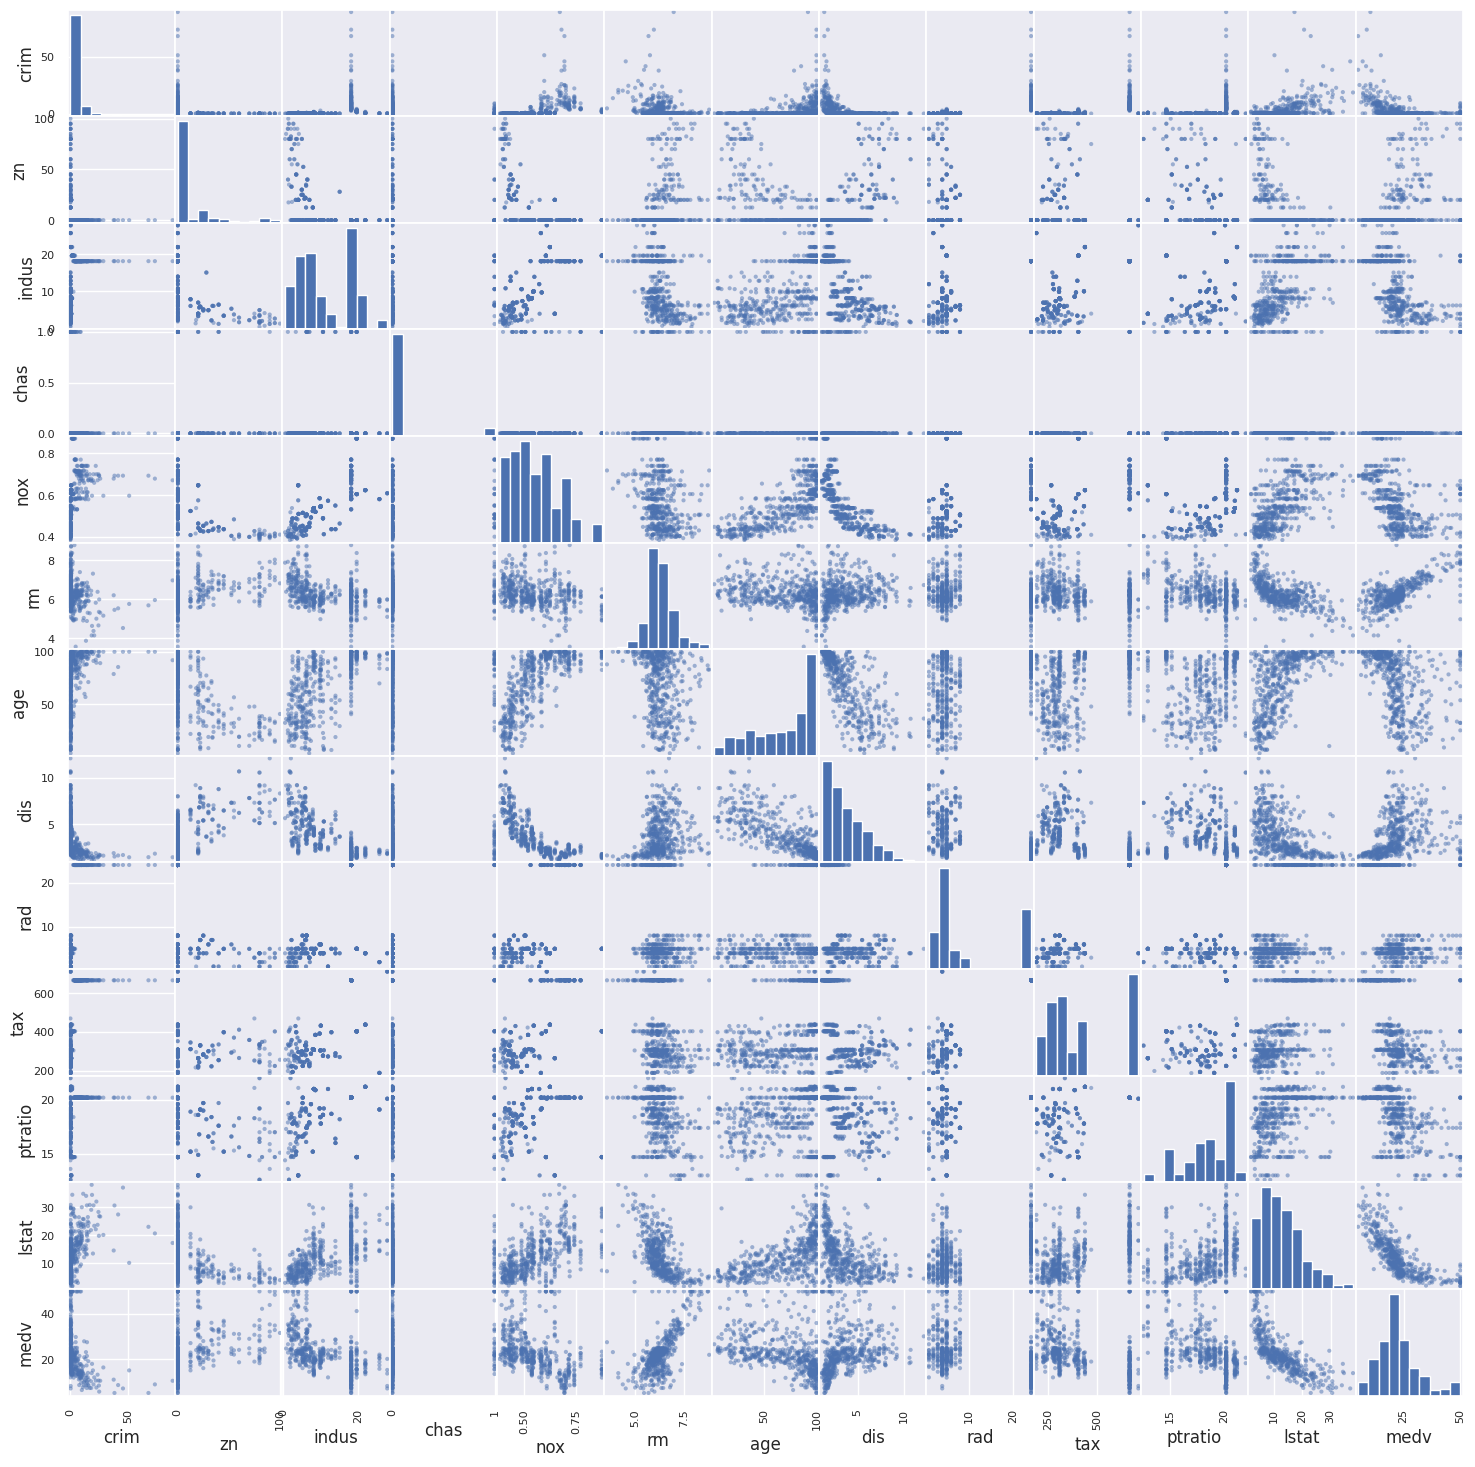

In [97]:
pd.plotting.scatter_matrix(boston, figsize=(18,18));

***(d)*** `medv`, `lstat`, `dis`, `age`, `nox`

In [98]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


***(e)***

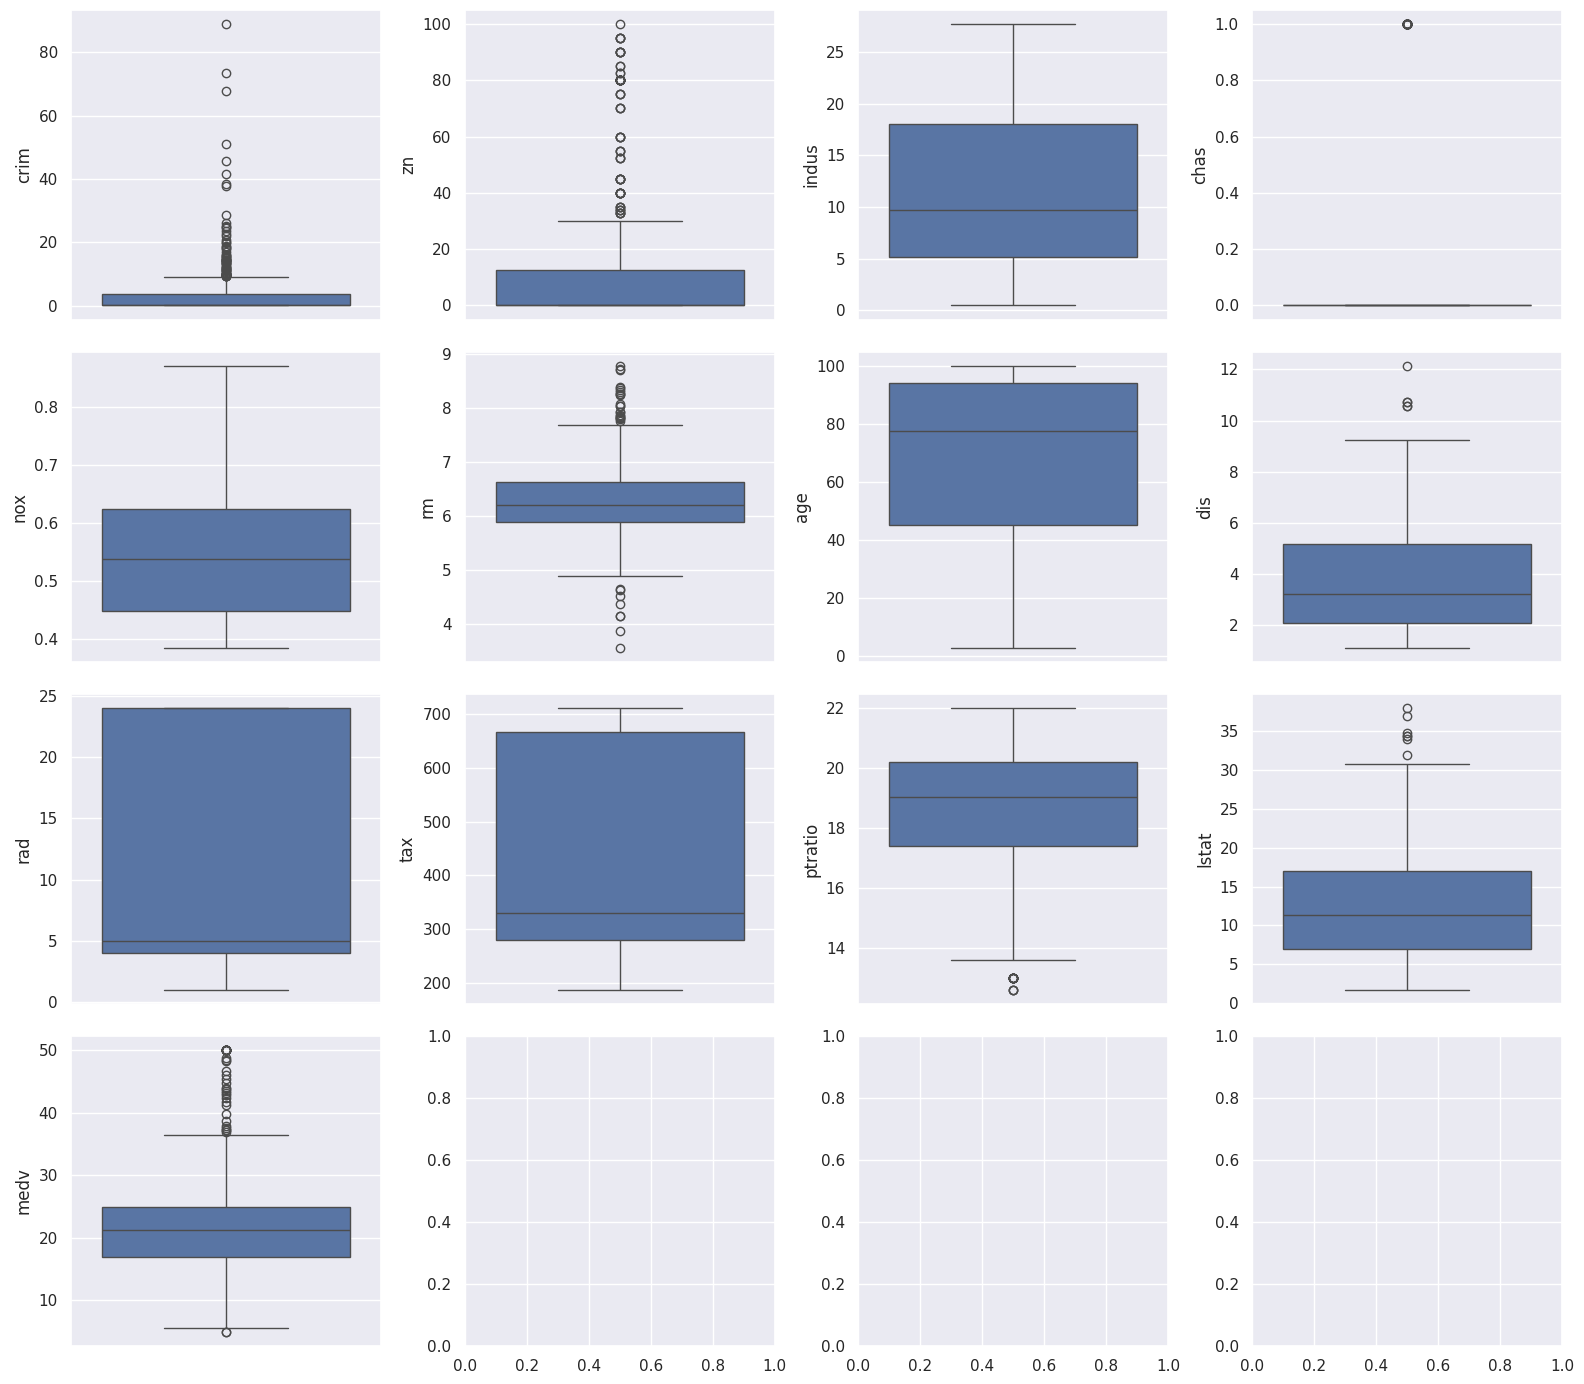

In [121]:
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

# Create boxplots using Seaborn
for i, column in enumerate(boston.columns):
    sns.boxplot(y=boston[column], ax=axes[i])
    # axes[i].set_title(column)
    
plt.tight_layout()

Yes there are a lot of suburbs in boston that happen to have particularly high crime rates. But tax rates and pupil-teacher ratios don't seem to be out of the ordinary.

***(f) How many of the suburbs in this data set bound the Charles river?***

In [122]:
boston['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

35 suburbs bound the Charles river.

***(g) What is the median pupil-teacher ratio among the towns in this data set?***

In [125]:
boston.median()['ptratio']

19.05

***(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.***

In [127]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [133]:
boston[boston['medv'] == boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


They're the highest in terms of proportion of houses built prior to 1940, and have high crime rates.

In [175]:
len(boston[boston['rm'] > 7])

64

In [176]:
len(boston[boston['rm'] > 8])

13